In [12]:
import os
import sys
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from DAWG.DAWG import dawg
from utils.utils import get_project_root
from automatos.conversion.conversor import conversor
from sklearn.metrics import *

<h1>1. Introdução</h1>


<h2>1.1 Conjunto de dados</h2>

<p>Para este trabalho foram utilizados dois conjuntos de dados, um para o
   treino(construção do dawg) e outra para as inferencias(teste), os conjuntos
   foram:</p>

   - **waltz.txt** para construção do dawg
   - **waltzdb.csv** para as inferências gramaticais

<p>Vale ressaltar que o conjunto de teste, contem dados de sequencias, na qual cada uma contem uma
   classificação, podendo ser amyloid ou non-amyloid.</p>

<h2>1.2 leitura dos dados</h2>

In [ ]:
train_path = get_project_root() + '/Automatos-Bioinformatica/datasets/' + 'waltz.txt'
train = pd.read_csv(train_path, header=None)

test_path = get_project_root() + '/Automatos-Bioinformatica/datasets/' + 'waltzdb.csv'
test = pd.read_csv(test_path)

<h2>1.3 Divisão do treino em palavras positivas e negativas</h2>

<p>No conjunto de treino, existem dois tipos de sequencia(string), as positivas e as negativas
    de acordo com o algoritmo de criação de dawg em
<a href="http://proceedings.mlr.press/v34/wieczorek14a.pdf">wieczorek14a</a>, logo é necessario dividir o conjunto
 de treino em strings positivas e outras.</p>

In [ ]:
plus_words = []
negative_words = []
for i in range(len(train)):
    if '\t+' in train.iloc[i][0]:
        w = train.iloc[i][0]
        plus_words.append(w[:len(w) - len('\t+')])
    else:
        negative_words.append(train.iloc[i][0])

<h1>2. Desenvolvimento do dawg com não determinismo</h1>

In [ ]:
print("Treino")
dawg_alg = dawg()
dawg_alg.create(plus_words, negative_words)

<h1>3. Inferência das seguências com dawg não deterministico</h1>

In [ ]:
target = 'amyloid'
N, M = test.shape
mean_time = 0

expected_number_target = len(test[test['Classification'] == target])
expected_number_non_target = N - expected_number_target
result = {
    'amyloid': 0,
    'non-amyloid': 0
}
y_out = []
for i in range(N):
    seguence = test.iloc[i]['Sequence']
    c = test.iloc[i]['Classification']

    seguence += '+'
    begin = datetime.datetime.now()
    token = dawg_alg.in_automato_language(seguence)
    finish = datetime.datetime.now()

    mean_time += (finish - begin).microseconds
    if token:
        if c == target:
            result[target] += 1
        y_out.append(target)
    elif not token:
        if c != target:
            result['non-amyloid'] += 1
        y_out.append('non-amyloid')
print(result)
print(expected_number_target)
print(expected_number_non_target)
print("mean Time per string in afnd: ", mean_time/N )

{'amyloid': 121, 'non-amyloid': 811}
244
845
mean Time per string in afnd:  35.70339761248852


<h2>3.1 Calculando acurácia, precisão e recall</h2>

In [ ]:
y_test = test['Classification'].to_numpy()

y_out = np.array(y_out)
print('ACC:', str(accuracy_score(y_out, y_test)))
print('R:', str(recall_score(y_out, y_test, average='binary', pos_label="amyloid")))
print('P:', str(precision_score(y_out, y_test, average='binary', pos_label="amyloid")))
print('AUC: ')

ACC: 0.8558310376492194
R: 0.7806451612903226
P: 0.4959016393442623
AUC: 


<h2>3.1 Testando com 10, 20, .. ate 1000 strings do conjunto de teste e verificando tempo</h2>

In [16]:
c = 'amyloid'
time_test = []
range_test = np.arange(1000, 1000000, 100000)
for number_words in range_test:
    mean_time = 0
    word_plus_to_use = ['AGVNYF+']*number_words
    print(type(word_plus_to_use[0]))
    for i in range(number_words):
        begin = datetime.datetime.now()
        token = dawg_alg.in_automato_language(word_plus_to_use[i])
        finish = datetime.datetime.now()
        mean_time += (finish - begin).microseconds

    time_test.append(mean_time/number_words)

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


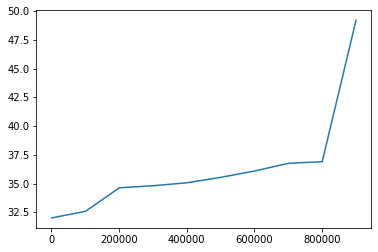

In [20]:
plt.plot(range_test, sorted(time_test))
plt.show()

In [14]:
range_test


array([ 1000, 11000, 21000, 31000, 41000])

In [22]:
sorted(time_test)

[32.018099875156054,
 32.58932630410655,
 34.63647075606277,
 34.81690547263682,
 35.072714285714284,
 35.54394059405941,
 36.095064837905234,
 36.76475207986689,
 36.90827345309381,
 49.207]